In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

# path = 'E:/'

def coloring():
    df_municipios = pd.read_csv('/ibge-municipios-2019.csv', encoding='latin-1', sep=';', header=0)
    df_mask=df_municipios['capital']==1
    df_capitais = df_municipios[df_mask]

    df_capitais = df_capitais.drop(['codigo_ibge','capital','codigo_uf'], axis = 1)
    df_capitais.columns = ['Capital [2010]','latitude','longitude']
    # df_capitais

    df_estados = pd.read_csv(path+'graph_kcolor/IBGE_EstadosBrasil.csv', encoding='UTF-8', sep=',', header=0)
    df_estados = df_estados.drop(['Código','Gentílico','Governador [2019]','Área Territorial - km²; [2020]','População estimada - pessoas [2020]','Densidade demográfica - hab/km²; [2010]','Matrículas no ensino fundamental - matrículas [2018]','IDH (Índice de desenvolvimento humano) [2010]','Receitas realizadas - R$(*1000)[2017]','Rendimento mensal domiciliar per capita - R$[2020]','Total de veículos - veículos[2018]','Despesas empenhadas - R$ (*1000) [2017]'], axis=1)
    SIGLAS = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG','PA','PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO']
    df_estados['sigla']=SIGLAS
    # df_estados
    
    df = df_estados.merge(df_capitais, on='Capital [2010]') 
    
    VIZINHOS = [['AM','RO'],
            ['PE','BA','SE'],
            ['PA'],
            ['RR','AC','RO','MT','PA'],
            ['SE','AL','PE','PI','TO','GO','MG','ES'],
            ['RN','PB','PE','PI'],
            ['GO','MG'],
            ['BA','GO','MS','SP','RJ','ES'],
            ['DF','TO','MT','MS','MG','BA'],
            ['PA','TO','PI','BA'],
            ['PA','AM','RO','MS','GO','TO'],
            ['MT','PR','SP','MG','GO'],
            ['BA','GO','DF','MS','SP','RJ','ES'],
            ['AP','RR','AM','MT','TO','MA'],
            ['RN','CE','PE'],
            ['SP','MS','SC'],
            ['PB','CE','PI','BA','AL'],
            ['MA','TO','BA','PE','CE'],
            ['ES','MG','SP'],
            ['CE','PB'],
            ['SC'],
            ['AM','AC','MT'],
            ['AM','PA'],
            ['PR','RS'],
            ['MG','MS','PR','RJ'],
            ['AL','BA'],
            ['MA','PA','MT','GO','BA','PI']]
    
    df['vizinhos']=VIZINHOS
    states = list(df['sigla'].unique())

    for i in range(len(df)):
        neighbors = dict(zip(df['sigla'], df['vizinhos']))

    colors = ['yellow', 'cyan', 'green', 'magenta', 'red', 'blue', 'orange', 
              'gray',  
               '#00555a', '#f7d560', '#5a7d9a', '#b6b129',
               '#a1dd72', '#d49acb', '#d4a69a', '#977e93',
               '#a3cc72', '#c60acb', '#d4b22a', '#255e53',
               '#77525a', '#c7d511', '#c4c22b', '#c9b329',
               '#c8dd22', '#f75acb', '#b1a40a', '#216693',
               '#b1cd32', '#b33acb', '#c9a32b', '#925e11',
               '#c5dd39', '#d04205', '#d8a82a', '#373e29']
    
    
    colors_of_states = {}
    def promising(state, color):
        for neighbor in neighbors.get(state): 
            color_of_neighbor = colors_of_states.get(neighbor)
            print(state,'Tem como vizinho:', neighbor, 'Colorido com:', color_of_neighbor)
            
            if color_of_neighbor == color:
                return False
        return True

    def get_color_for_state(state):
        for color in colors:
            print('\nAnalisando a cor',color,'para',state)
            if promising(state, color):
                print('Pode-se utilizar a cor',color,'para',state)
                return color

    def main():
        for state in states:
            colors_of_states[state] = get_color_for_state(state)
            if len(colors_of_states) >1:
                print('\n',len(colors_of_states),'Estados já coloridos:',colors_of_states)
            else:
                print('\n',len(colors_of_states),'Estado já colorido:',colors_of_states)
        
        return colors_of_states

    dic_colours = main()
    # dic_colours
    
    
    G = nx.Graph()
    G.add_nodes_from(df['sigla'].unique())
    # list(G.nodes())

    list_edges=[]
    for i in range(len(df)):
        for e in df['vizinhos'][i]:
            edge = (df['sigla'][i], e)
            list_edges.append(edge)
    # list_edges
    
    for e in range(len(list_edges)):
        origem, destino = list_edges[e]
        G.add_edge(origem, destino)
        # list(G.edges())
    
    a = list(G.nodes())
    print('\n     Sequência de nós:', a)
    print('\n   Sequência de cores: 1-Yellow, 2-Cyan, 3-Green, 4-Magenta, 5-Red, 6-Blue, 7-Orange, 8-Gray...')

    node_colours = []
    for i in range(len(a)):
        x = df[df['sigla'] == a[i]]
        x = x.iloc[0, 2]
        c = dic_colours[x]
        node_colours.append(c)

    pos = {'AC': np.array([-70.0, -10.0]),
           'AL': np.array([-35.0, -10.0]),
           'AP': np.array([-52.5, 2.5]),
           'AM': np.array([-65.0, -5.0]),
           'BA': np.array([-42.5, -12.5]),
           'CE': np.array([-40.0, -5.0]),
           'DF': np.array([-50.0, -15.0]),
           'ES': np.array([-40.0, -20.0]),
           'GO': np.array([-51.0, -17.5]),
           'MA': np.array([-45.0, -5.0]),
           'MT': np.array([-55.0, -12.5]),
           'MS': np.array([-55.0, -20.0]),
           'MG': np.array([-46.0, -17.5]),
           'PA': np.array([-55.0, -5.0]),
           'PB': np.array([-35.5, -7.0]),
           'PR': np.array([-52.5, -25]),
           'PE': np.array([-35.0, -8.5]),
           'PI': np.array([-42.0, -7.5]),
           'RJ': np.array([-44.0, -22.5]),
           'RN': np.array([-37.0, -5.5]),
           'RS': np.array([-52.5, -30.0]),
           'RO': np.array([-62.5, -10.0]),
           'RR': np.array([-62.5, 2.5]),
           'SC': np.array([-50.0, -27.5]),
           'SP': np.array([-49.0, -22.5]),
           'SE': np.array([-36.0, -11.0]),
           'TO': np.array([-50.0, -10.0]),
    }

    
    
    fig = plt.figure(figsize=(20, 20)) # Creates a new figure
    fig.suptitle('Grafo de Colaboração Estados do Brasil', fontsize=24)

    
    # nodes
    nx.draw_networkx_nodes(G, 
                           pos,  
                           node_size=1800,
                           node_shape='o',
                           node_color=node_colours,
                           alpha=0.7)

    # labels
    nn = list(G.nodes)
    diclabel = {}
    for i in range(len(nn)):
        x = df[df['sigla'] == nn[i]]
        xid = x.iloc[0, 2]
        xname = x.iloc[0, 2]
        diclabel[str(xid)] = xname

    # edges
    nx.draw_networkx_edges(G, 
                           pos,  
                           width=2, 
                           edge_color='orange')

    # labels
    nx.draw_networkx_labels(G, 
                            pos, 
                            labels=diclabel, 
                            font_size=14, 
                            font_family='sans-serif')

    # Determina o número cromático do Grafo, ou seja, a menor quantidade de cores que colore o grafo conforme as restrições
    cores_nodes = nx.coloring.greedy_color(G,strategy='largest_first')
    nr_cromatico = max(cores_nodes, key=cores_nodes.get)

    print('\n   Quantidade de nós coloridos:',len(node_colours))
    print('\nQuantidade de cores utilizadas:', cores_nodes[nr_cromatico]+1)

    
    plt.title('Coloração dos estados brasileiros sem repetição de cor para estados vizinhos')
    plt.axis('off')
    plt.savefig(path+'graph_kcolor/GrafoColoracao_EstadosBrasil.png')
    plt.show()

ImportError: DLL load failed: Não foi possível encontrar o módulo especificado.

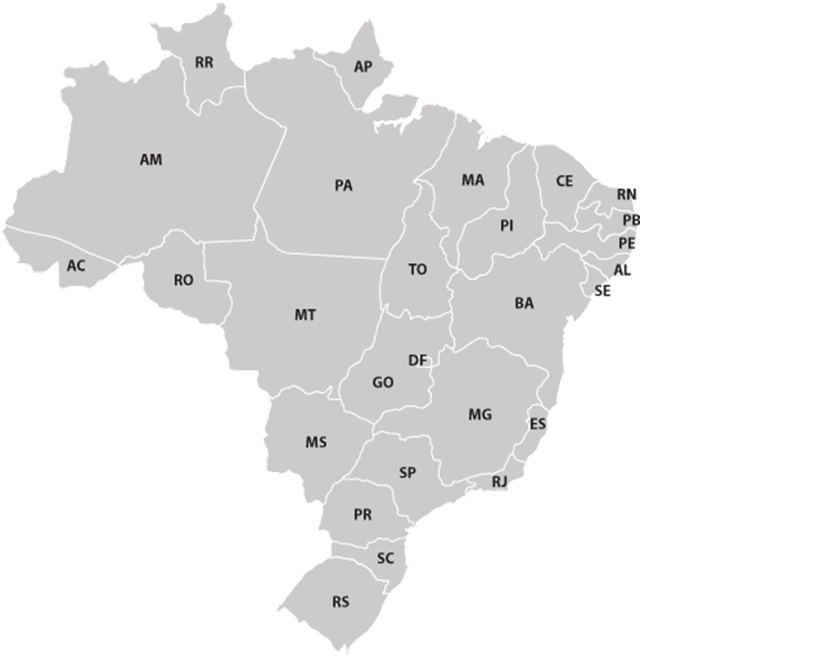


Analisando a cor yellow para AC
AC Tem como vizinho: AM Colorido com: None
AC Tem como vizinho: RO Colorido com: None
Pode-se utilizar a cor yellow para AC

 1 Estado já colorido: {'AC': 'yellow'}

Analisando a cor yellow para AL
AL Tem como vizinho: PE Colorido com: None
AL Tem como vizinho: BA Colorido com: None
AL Tem como vizinho: SE Colorido com: None
Pode-se utilizar a cor yellow para AL

 2 Estados já coloridos: {'AC': 'yellow', 'AL': 'yellow'}

Analisando a cor yellow para AP
AP Tem como vizinho: PA Colorido com: None
Pode-se utilizar a cor yellow para AP

 3 Estados já coloridos: {'AC': 'yellow', 'AL': 'yellow', 'AP': 'yellow'}

Analisando a cor yellow para AM
AM Tem como vizinho: RR Colorido com: None
AM Tem como vizinho: AC Colorido com: yellow

Analisando a cor cyan para AM
AM Tem como vizinho: RR Colorido com: None
AM Tem como vizinho: AC Colorido com: yellow
AM Tem como vizinho: RO Colorido com: None
AM Tem como vizinho: MT Colorido com: None
AM Tem como vizinho: PA Colo

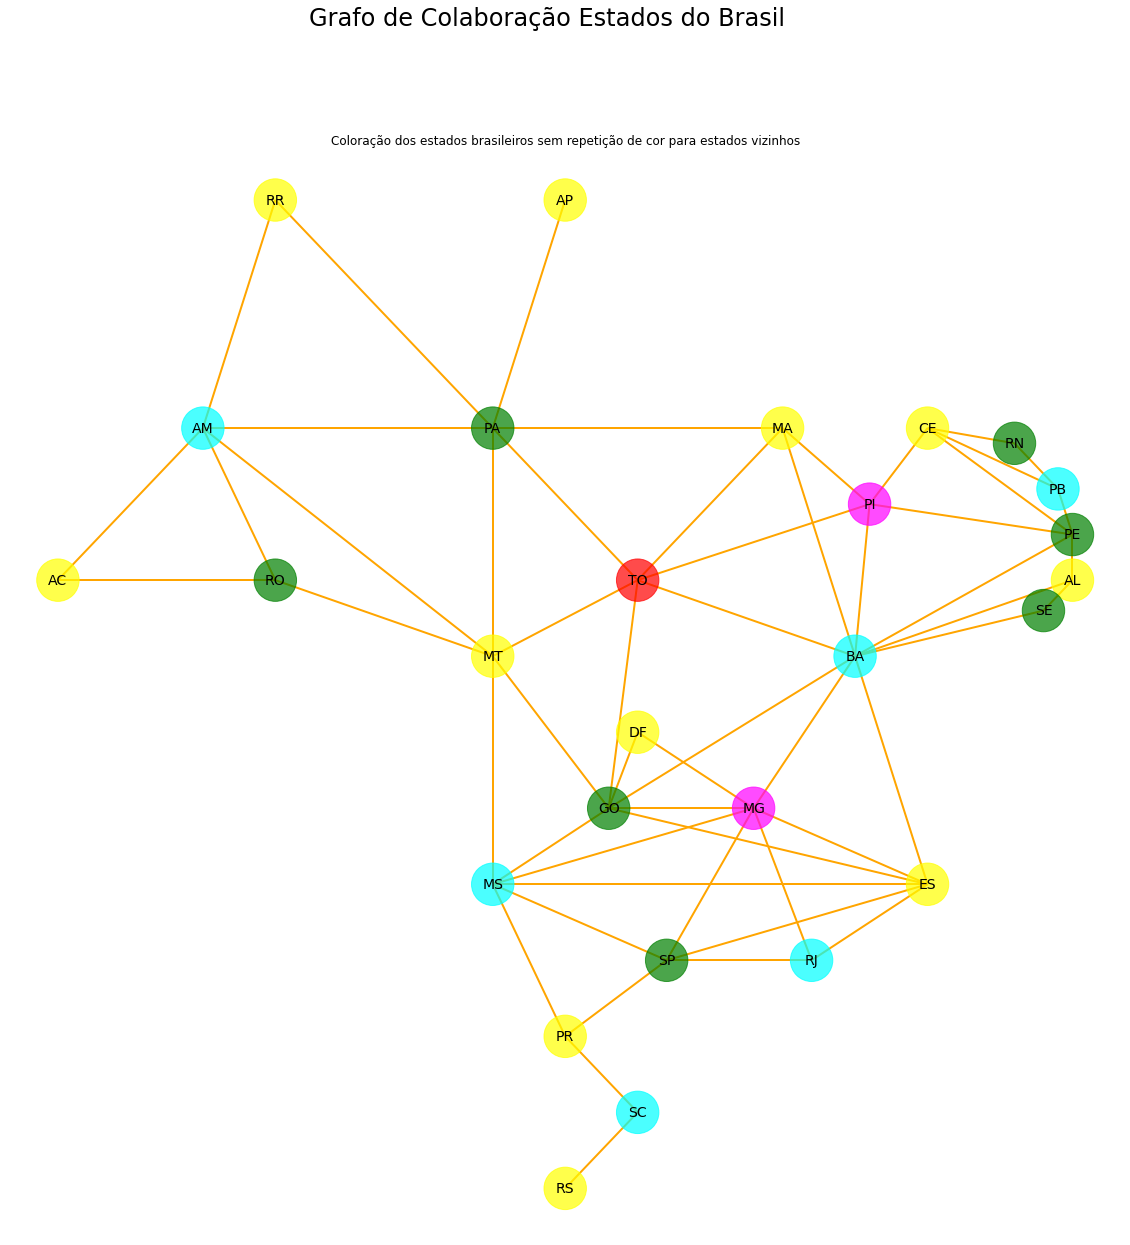

In [2]:
coloring()

# ==============================================================
# Questão 02: 
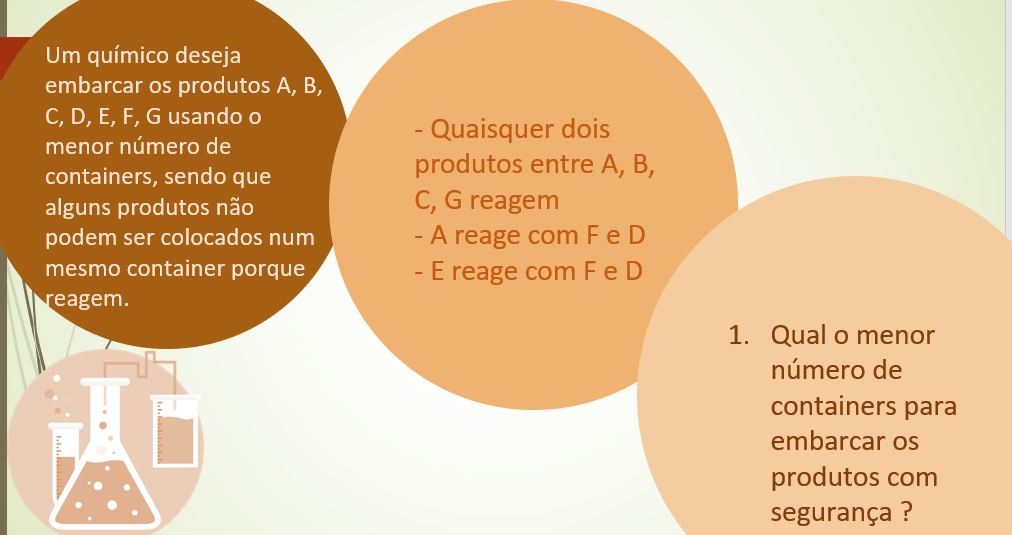

## Contexto:
Um químico deseja embarcar os produtos A, B, C, D, E, F, G usando o menor número de containers, sendo que alguns produtos não podem ser colocados num mesmo container porque reagem:

## Restrições:
    - Quaisquer dois produtos entre A, B, C, G
    - A reage com F e D
    - E reage com F e D

## Demanda:
### Calcular qual é o menor número de containers para embarcar os produtos com segurança.
  
O número cromático será equivalente ao mínimo número de containers para transportar os produtos com segurança.

# Solução:
## Tipo: Problema de Coloração em Grafos
Seja G(V, A) um grafo e C = {c1, c2, c3, . . . , cm} um conjunto de cores. Uma coloração de G é uma atribuição de cores aos vértices de G de tal forma que dois vértices adjacentes recebam cores diferentes. O número cromático de um grafo G é o menor número de cores necessário para obter uma coloração de G. Se o número cromático é χ(G), dizemos que o grafo é χ(G)-cromático.

In [3]:
# Definição do grafo
G = nx.Graph()
V = {('Produto:', 'A'), ('Produto:', 'B'), ('Produto:', 'C'), ('Produto:', 'D'), ('Produto:', 'E'), ('Produto:', 'F'), ('Produto:', 'G')}

# Arestas
V = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
A = [('A', 'B'), ('A', 'C'), ('A', 'G'), ('B', 'C'), ('B', 'G'), ('C', 'G'), ('A', 'D'), ('A','F'), ('D', 'E'), ('E', 'F')]

G.add_nodes_from(V)
G.add_edges_from(A)

In [4]:
G.nodes

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G'))

In [5]:
G.edges

EdgeView([('A', 'B'), ('A', 'C'), ('A', 'G'), ('A', 'D'), ('A', 'F'), ('B', 'C'), ('B', 'G'), ('C', 'G'), ('D', 'E'), ('E', 'F')])

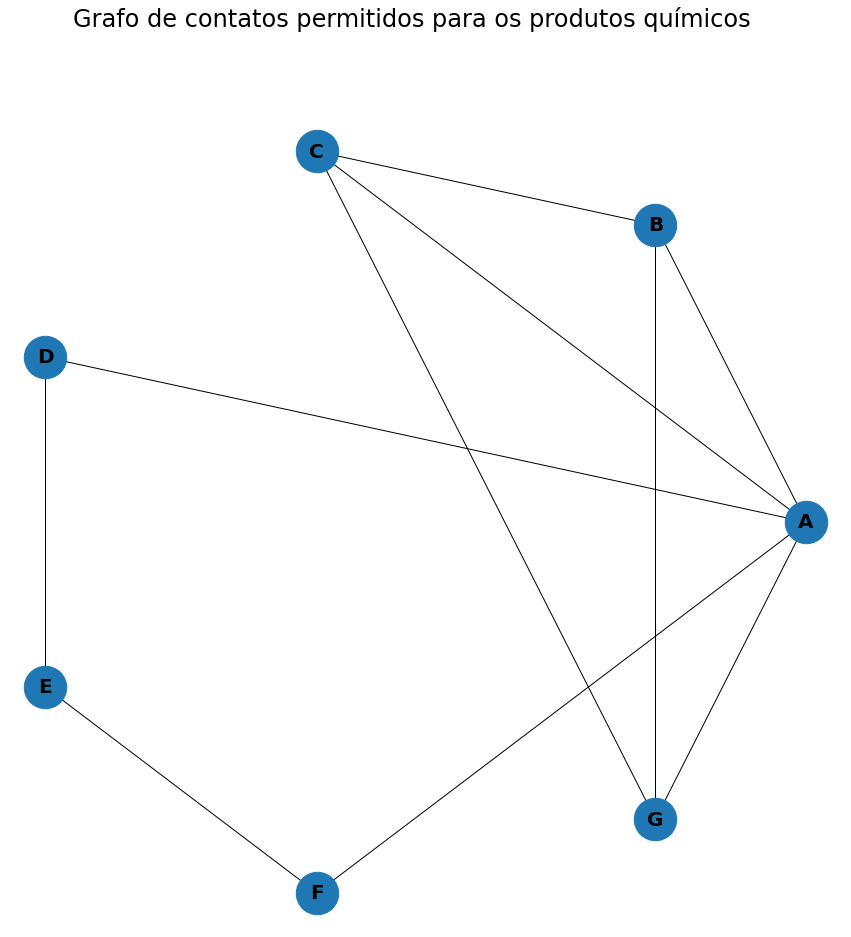

In [6]:
fig = plt.figure(figsize=(15, 15)) # Creates a new figure
fig.suptitle('Grafo de contatos permitidos para os produtos químicos', fontsize=24)
plt.subplot()
nx.draw(G, 
        pos=nx.circular_layout(G), 
        with_labels=True, 
        font_weight='bold', 
        font_color='black',
        node_size=1800,
        font_size=20,
        node_shape='o',)

plt.show()

## Utilizando as estratégias de coloração implementadas no NetworkX:

In [7]:
# Determina o número cromático do Grafo, ou seja, a menor quantidade de cores que colore o grafo conforme as restrições
cores_nodes = nx.coloring.greedy_color(G,strategy='largest_first')

nr_cromatico = max(cores_nodes, key=cores_nodes.get)

print('Número mínimo de Containers:', cores_nodes[nr_cromatico]+1)

cores_nodes

Número mínimo de Containers: 4


{'A': 0, 'B': 1, 'C': 2, 'G': 3, 'D': 1, 'E': 0, 'F': 1}

In [8]:
# define a cor de cada vértice
col_map = []
lon_map = []
lat_map = []
nodes_yellow = 0
nodes_cyan   = 0
nodes_green  = 0
nodes_magenta= 0

for node in G:
    if cores_nodes[node] == 0:
        col_map.append('yellow')
        lon_map.append(10.0)
        nodes_yellow +=1
        lat_map.append(nodes_yellow*10+5)
#         print(node, 'yellow', nodes_yellow)
        
    if cores_nodes[node] == 1:
        col_map.append('cyan')
        lon_map.append(20.0)
        nodes_cyan   +=1
        lat_map.append(nodes_cyan*10)
#         print(node, 'cyan', nodes_cyan)
        
    if cores_nodes[node] == 2:
        col_map.append('green')
        lon_map.append(30.0)
        nodes_green +=1
        lat_map.append(nodes_green*10)
#         print(node, 'green', nodes_green)
        
    if cores_nodes[node] == 3:
        col_map.append('magenta')
        lon_map.append(40.0)
        nodes_magenta +=1
        lat_map.append(nodes_magenta*10+10)
#         print(node, 'magenta', nodes_magenta)
        
# print('\n',col_map)
# print('\n',lat_map)
        
minimo = cores_nodes[nr_cromatico]+1

posG = {'A': np.array([lon_map[0], lat_map[0]]),
       'B': np.array([lon_map[1], lat_map[1]]),
       'C': np.array([lon_map[2], lat_map[2]]),
       'D': np.array([lon_map[3], lat_map[3]]),
       'E': np.array([lon_map[4], lat_map[4]]),
       'F': np.array([lon_map[5], lat_map[5]]),
       'G': np.array([lon_map[6], lat_map[6]])
}

In [9]:
print(nodes_yellow, nodes_cyan, nodes_green, nodes_magenta)

2 3 1 1


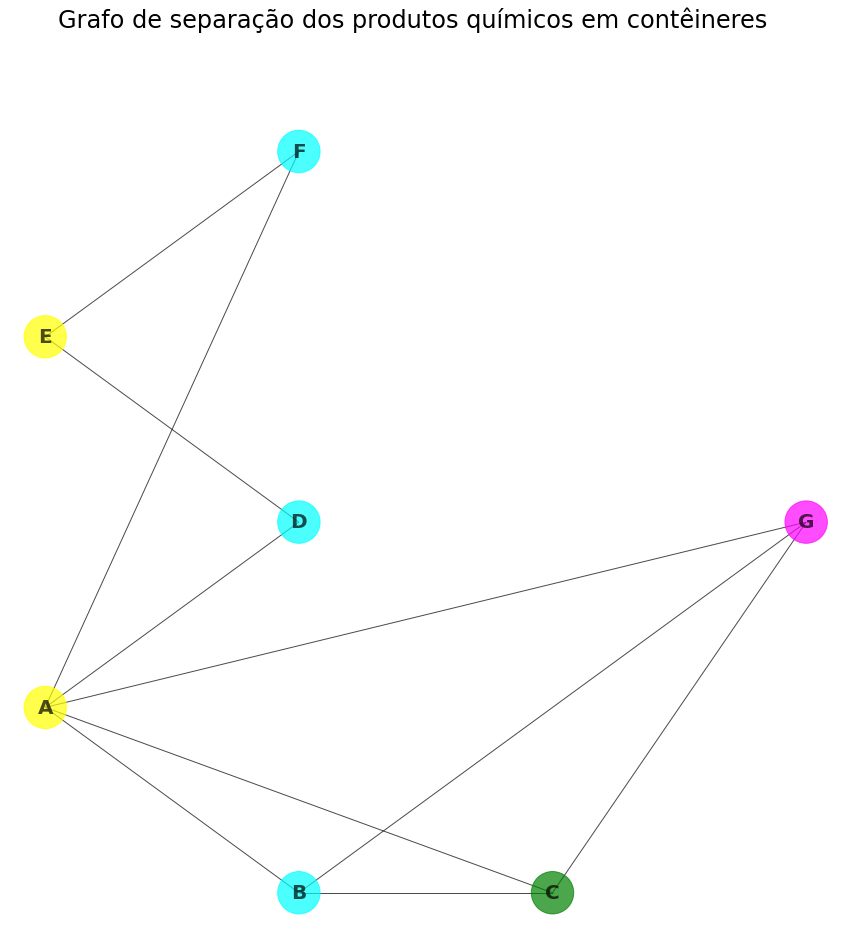

In [10]:
# Mostra o grafo colorido
fig = plt.figure(figsize=(15, 15)) # Creates a new figure
fig.suptitle('Grafo de separação dos produtos químicos em contêineres', fontsize=24)
plt.subplot()
nx.draw(G, 
        pos=posG, 
        with_labels=True, 
        font_weight='bold', 
        font_color='black',
        node_size=1800,
        font_size=20,
        node_shape='o',
        alpha=0.7,
        node_color=col_map)

plt.savefig(path+'graph_kcolor/GrafoSeparacao_ProdutosQuimicos.png')
plt.show()

# ==============================================================
# Questão 03: Canil
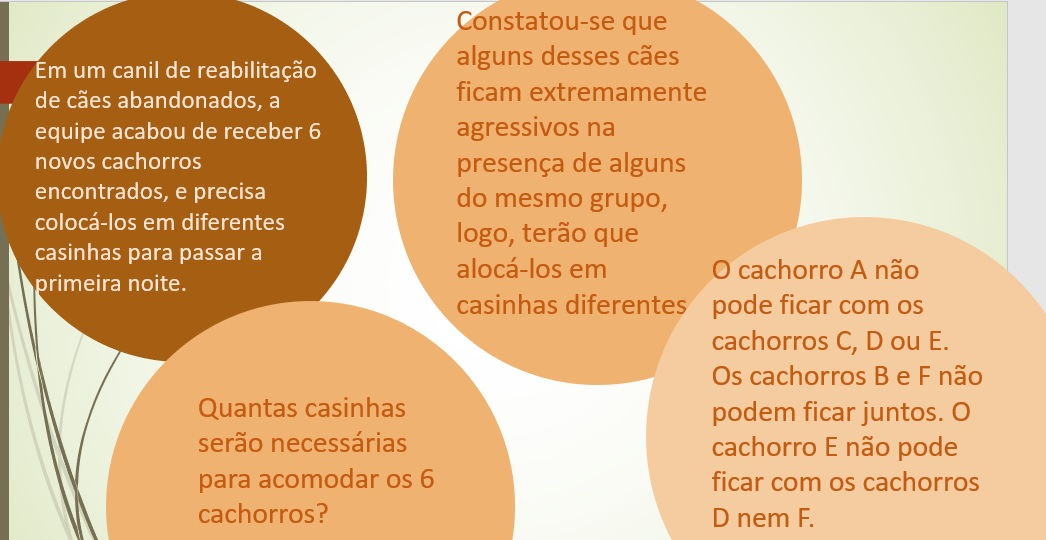

## Contexto:
Em um canil de reabilitação de cães abandonados, a equipe acabou de receber 6 novos cachorros encontrados, e precisa colocá-los em diferentes casinhas para passar a primeira noite. Constatou-se que alguns cães ficam extremamente agressivos na presença de cães de mesmo grupo, logo, terão que alocá-los em casinhas diferentes.

## Restrições:
    - O cão A não pode ficar com o cão C, D ou E;
    - Os cães B e F não podem ficar juntos;
    - O cachorro E não pode ficar com nenhum dos cachorros D ou F.

## Demanda:
### Calcular qual é o menor número de casinhas para acomodar os 6 cachorros sem conflito.
  
O número cromático será equivalente ao mínimo número de casinhas para alocar os cães com segurança.

In [11]:
# Definição do grafo
C = nx.Graph()
V = {('Cão:', 'A'), ('Cão:', 'B'), ('Cão:', 'C'), ('Cão:', 'D'), ('Cão:', 'E'), ('Cão:', 'F')}

# Para definir o número mínimo, vamos estabelecer como arestas os conflitos possíveis
# Matriz de adjascência para restrições, conflito significa valor = 1
#  A B C D E F
# A- 0 1 1 1 1   
# B- - 0 0 0 1
# C- - - 0 0 0
# D- - - - 1 1
# E- - - - - 1
# F- - - - - -

# Arestas que existem significam conflito
V = ['A', 'B', 'C', 'D', 'E', 'F']
A = [('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'F'), ('D', 'E'), ('D', 'F'), ('E','F')]

C.add_nodes_from(V)
C.add_edges_from(A)

In [12]:
C.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'F'))

In [13]:
C.edges()

EdgeView([('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')])

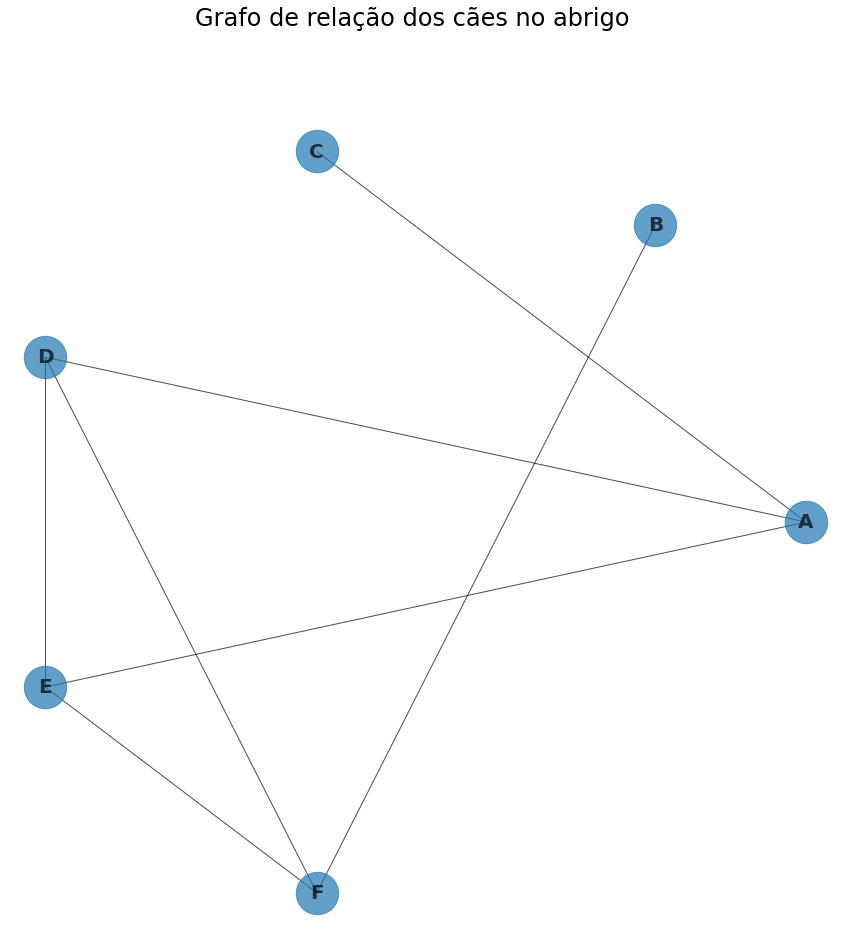

In [14]:
fig = plt.figure(figsize=(15, 15)) # Creates a new figure
fig.suptitle('Grafo de relação dos cães no abrigo', fontsize=24)
plt.subplot()

nx.draw(C, 
        pos=nx.circular_layout(G), 
        with_labels=True, 
        font_weight='bold', 
        font_color="black",
        node_size=1800,
        font_size=20,
        node_shape='o',
        alpha=0.7)

plt.show()

In [15]:
# Determina o número cromático do Grafo, ou seja, a menor quantidade de cores que colore o grafo conforme as restrições
cores_nodes = nx.coloring.greedy_color(C, strategy='largest_first')

nr_cromatico = max(cores_nodes, key=cores_nodes.get)

print('Número mínimo de casinhas:', cores_nodes[nr_cromatico]+1)

cores_nodes

Número mínimo de casinhas: 3


{'A': 0, 'D': 1, 'E': 2, 'F': 0, 'B': 1, 'C': 1}

In [16]:
# define a cor de cada vértice
col_map = []
lon_map = []
lat_map = []
nodes_yellow = 0
nodes_cyan   = 0
nodes_green  = 0
nodes_magenta= 0

for node in C:
    if cores_nodes[node] == 0:
        col_map.append('yellow')
        lon_map.append(10.0)
        nodes_yellow +=1
        lat_map.append(nodes_yellow*10+5)
#         print(node, 'yellow', nodes_yellow)
        
    if cores_nodes[node] == 1:
        col_map.append('cyan')
        lon_map.append(20.0)
        nodes_cyan   +=1
        lat_map.append(nodes_cyan*10)
#         print(node, 'cyan', nodes_cyan)
        
    if cores_nodes[node] == 2:
        col_map.append('green')
        lon_map.append(30.0)
        nodes_green +=1
        lat_map.append(nodes_green*10+10)
#         print(node, 'green', nodes_green)
        
    if cores_nodes[node] == 3:
        col_map.append('magenta')
        lon_map.append(40.0)
        nodes_magenta +=1
        lat_map.append(nodes_magenta*10+10)
#         print(node, 'magenta', nodes_magenta)
        
print('\n',col_map)
print('\n',lat_map)
        
minimo = cores_nodes[nr_cromatico]+1

posC = {'A': np.array([lon_map[0], lat_map[0]]),
       'B': np.array([lon_map[1], lat_map[1]]),
       'C': np.array([lon_map[2], lat_map[2]]),
       'D': np.array([lon_map[3], lat_map[3]]),
       'E': np.array([lon_map[4], lat_map[4]]),
       'F': np.array([lon_map[5], lat_map[5]])
}


 ['yellow', 'cyan', 'cyan', 'cyan', 'green', 'yellow']

 [15, 10, 20, 30, 20, 25]


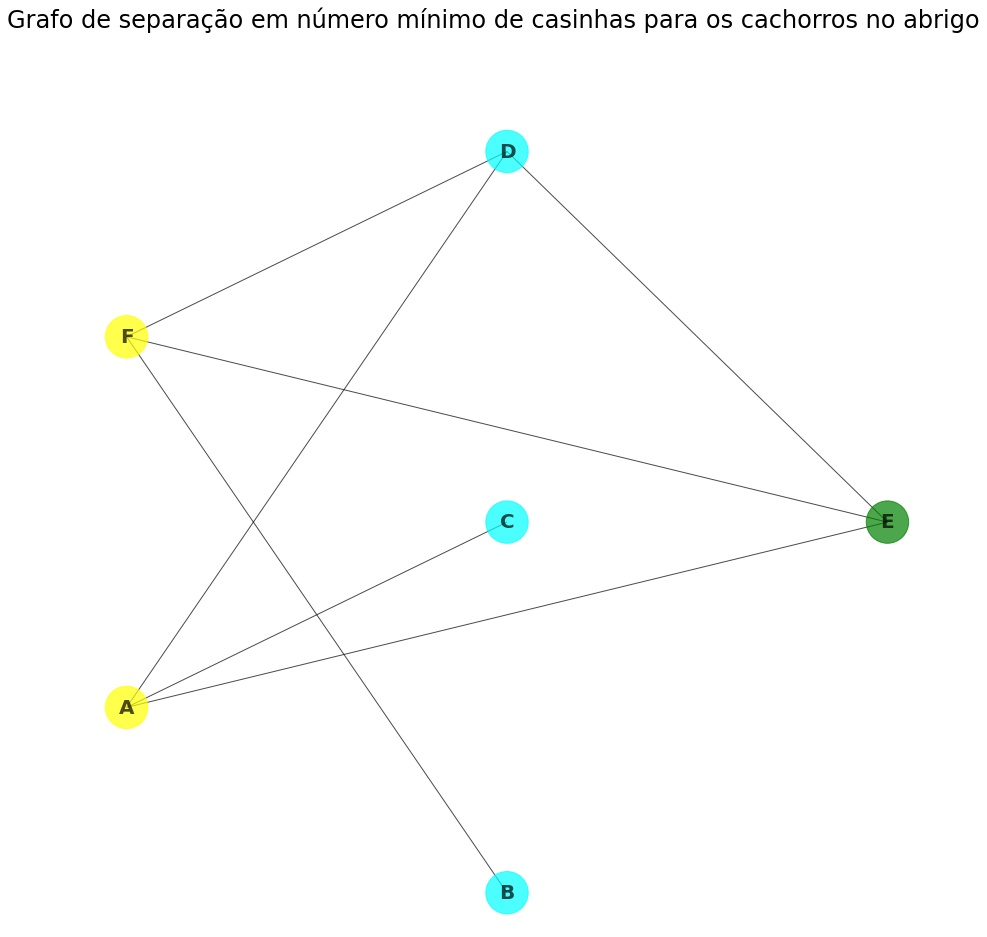

In [17]:
# Mostra o grafo colorido
fig = plt.figure(figsize=(15, 15)) # Creates a new figure
fig.suptitle('Grafo de separação em número mínimo de casinhas para os cachorros no abrigo', fontsize=24)
plt.subplot()
nx.draw(C, 
        pos=posC, 
        with_labels=True, 
        font_weight='bold', 
        font_color='black',
        node_size=1800,
        font_size=20,
        node_shape='o',
        alpha=0.7,
        node_color=col_map)

plt.savefig(path+'graph_kcolor/GrafoSeparacao_CasinhasCachorros.png')
plt.show()

# ==============================================================
# Questão 04: Canil
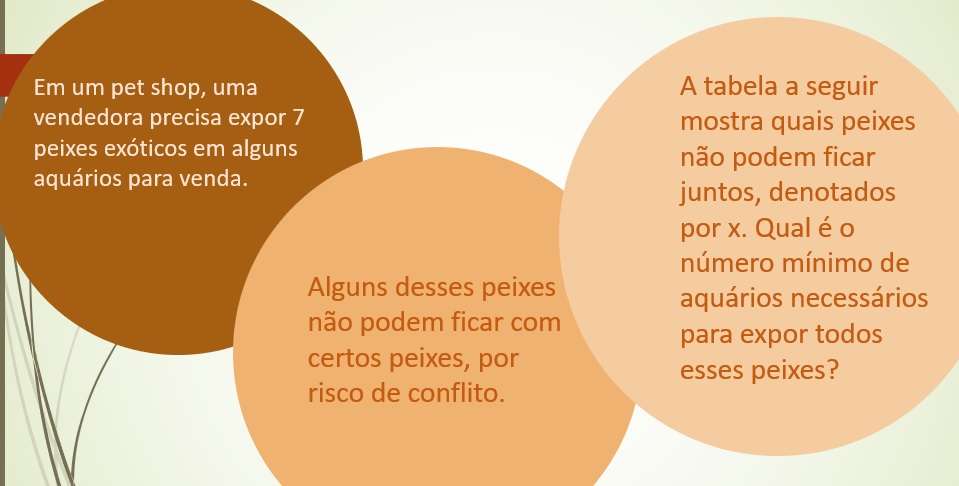

## Contexto:
Em um petshop, uma vendedora precisa expor 7 peixes exóticos em alguns aquários para venda. Alguns desses peixes não podem ficar com certos peixes, por risco de conflito. 

## Restrições:
    - A tabela a seguir mostra quais peixes não podem ficar juntos, denotados por X.
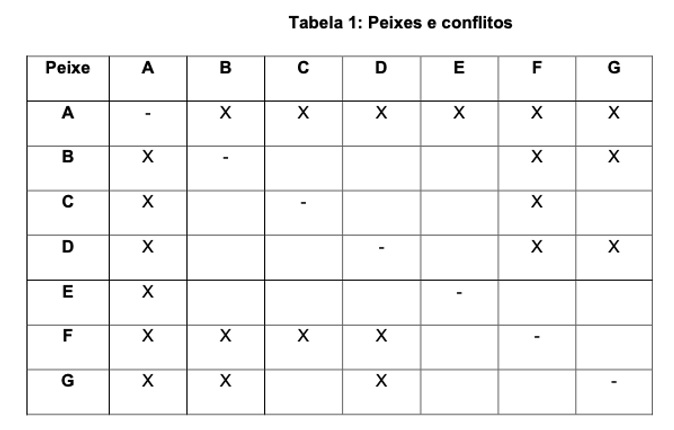

## Demanda:
### Calcular qual é o menor número mínimo de aquários para expor todos esses peixes sem conflito.
  
O número cromático será equivalente ao mínimo número de aquários para expor os peixes com segurança.

In [18]:
# Definição do grafo
P = nx.Graph()
V = {('Peixe:', 'A'), ('Peixe:', 'B'), ('Peixe:', 'C'), ('Peixe:', 'D'), ('Peixe:', 'E'), ('Peixe:', 'F'), ('Peixe:', 'G')}

# Para definir o número mínimo, vamos estabelecer como arestas os conflitos possíveis
# Matriz de adjascência para restrições, conflito significa valor = 1
#  A B C D E F
# A- 0 1 1 1 1   
# B- - 0 0 0 1
# C- - - 0 0 0
# D- - - - 1 1
# E- - - - - 1
# F- - - - - -

# Arestas que existem significam conflito
V = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
A = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('A', 'G'), 
     ('B', 'F'), ('B', 'G'), ('C', 'F'), ('D', 'F'), ('D','G')]

P.add_nodes_from(V)
P.add_edges_from(A)

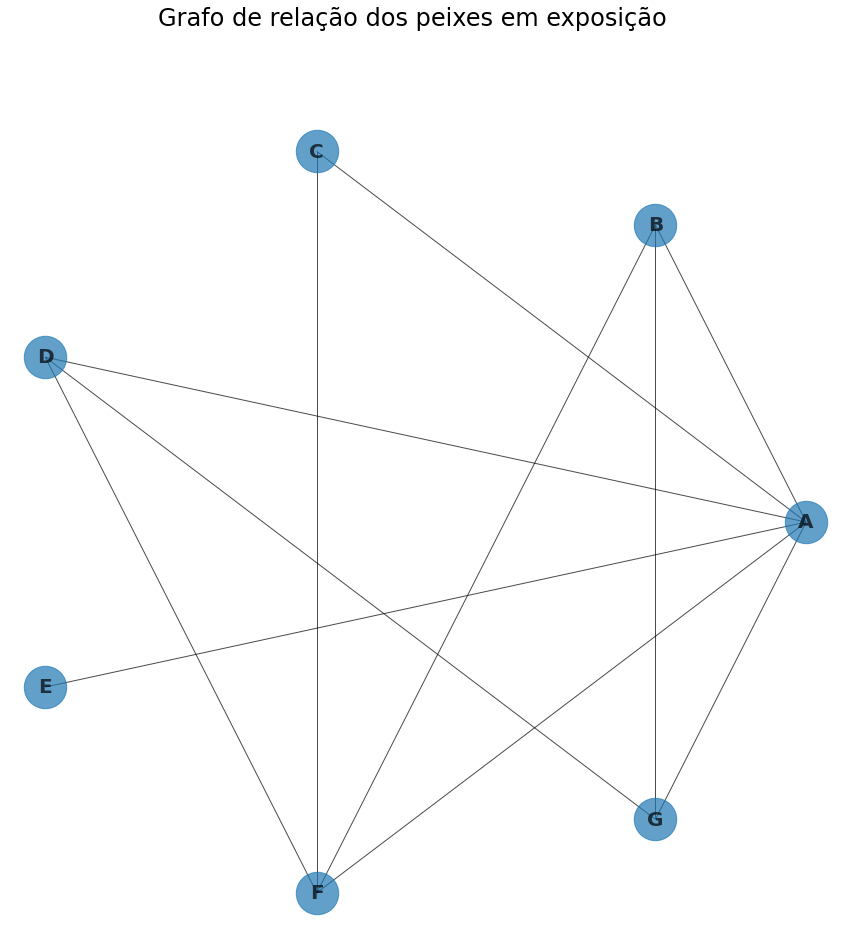

In [19]:
fig = plt.figure(figsize=(15, 15)) # Creates a new figure
fig.suptitle('Grafo de relação dos peixes em exposição', fontsize=24)
plt.subplot()

nx.draw(P, 
        pos=nx.circular_layout(P), 
        with_labels=True, 
        font_weight='bold', 
        font_color="black",
        node_size=1800,
        font_size=20,
        node_shape='o',
        alpha=0.7)

plt.show()

In [20]:
# Determina o número cromático do Grafo, ou seja, a menor quantidade de cores que colore o grafo conforme as restrições
cores_nodes = nx.coloring.greedy_color(P, strategy='largest_first')

nr_cromatico = max(cores_nodes, key=cores_nodes.get)

print('Número mínimo de aquários:', cores_nodes[nr_cromatico]+1)

cores_nodes

Número mínimo de aquários: 3


{'A': 0, 'F': 1, 'B': 2, 'D': 2, 'G': 1, 'C': 2, 'E': 1}

In [21]:
print(nodes_yellow, nodes_cyan, nodes_green)

2 3 1


In [22]:
# define a cor de cada vértice
col_map = []
lon_map = []
lat_map = []
nodes_yellow = 0
nodes_cyan   = 0
nodes_green  = 0

for node in P:
    if cores_nodes[node] == 0:
        col_map.append('yellow')
        lon_map.append(10.0)
        nodes_yellow +=1
        lat_map.append(nodes_yellow*10+10)
        print(node, 'yellow', nodes_yellow)
        
    if cores_nodes[node] == 1:
        col_map.append('cyan')
        lon_map.append(20.0)
        nodes_cyan   +=1
        lat_map.append(nodes_cyan*10)
        print(node, 'cyan', nodes_cyan)
        
    if cores_nodes[node] == 2:
        col_map.append('green')
        lon_map.append(30.0)
        nodes_green +=1
        lat_map.append(nodes_green*10)
        print(node, 'green', nodes_green)
        
        
print('\n',col_map)
print('\n',lat_map)
        
posP = {'A': np.array([lon_map[0], lat_map[0]]),
       'B': np.array([lon_map[1], lat_map[1]]),
       'C': np.array([lon_map[2], lat_map[2]]),
       'D': np.array([lon_map[3], lat_map[3]]),
       'E': np.array([lon_map[4], lat_map[4]]),
       'F': np.array([lon_map[5], lat_map[5]]),
       'G': np.array([lon_map[6], lat_map[6]])
       
}

posP

A yellow 1
B green 1
C green 2
D green 3
E cyan 1
F cyan 2
G cyan 3

 ['yellow', 'green', 'green', 'green', 'cyan', 'cyan', 'cyan']

 [20, 10, 20, 30, 10, 20, 30]


{'A': array([10., 20.]),
 'B': array([30., 10.]),
 'C': array([30., 20.]),
 'D': array([30., 30.]),
 'E': array([20., 10.]),
 'F': array([20., 20.]),
 'G': array([20., 30.])}

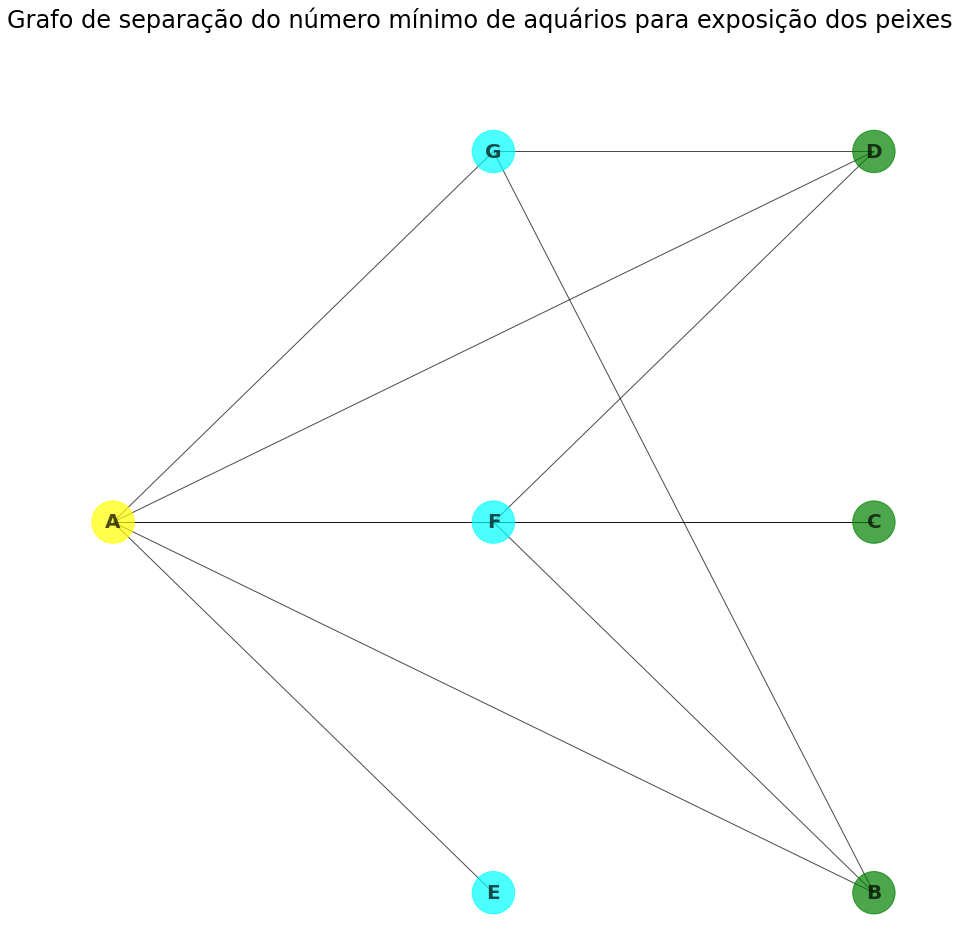

In [23]:
# Mostra o grafo colorido
fig = plt.figure(figsize=(15, 15)) # Creates a new figure
fig.suptitle('Grafo de separação do número mínimo de aquários para exposição dos peixes', fontsize=24)
plt.subplot()
nx.draw(P, 
        pos=posP, 
        with_labels=True, 
        font_weight='bold', 
        font_color='black',
        node_size=1800,
        font_size=20,
        node_shape='o',
        alpha=0.7,
        node_color=col_map)

plt.savefig(path+'graph_kcolor/GrafoSeparacao_Peixes.png')
plt.show()